### Importing libraries

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
import requests

In [3]:
requests.get("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt")

<Response [200]>

### Getting Information from URL

In [4]:
response=requests.get("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt")

### Looking at the data

In [6]:
response.text

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

### Storing the data

In [7]:
data =response.text

In [8]:
corpus = data.lower().split("\n")

In [9]:
corpus

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery, so gazed on now,",
 "will be a tatter'd weed, of small worth held:",
 "then being ask'd where all thy beauty lies,",
 'where all the treasure of thy lusty days,',
 'to say, within thine own deep-sunken eyes,',

### Fitting the tokenizer on text

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

### Creating input sequences using list of tokens

In [13]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [16]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

### Splitting the predictors&Labels 

In [17]:
predictors = input_sequences[:,:-1]
label=input_sequences[:,-1]

### One hot encoding the Labels

In [ ]:
label = ku.to_categorical(label, num_classes=total_words)

In [21]:
print(label)
print(predictors)
print(input_sequences)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[   0    0    0 ...    0    0   34]
 [   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 ...
 [   0    0    0 ... 3209  493  493]
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]]
[[   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 [   0    0    0 ...  417  877  166]
 ...
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]
 [   0    0    0 ... 3210   15   14]]


### Creating the model

In [22]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [23]:
total_words

3211

### Fitting the model

In [24]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 124s 8ms/sample - loss: 6.9145 - accuracy: 0.0209
Epoch 2/100
15462/15462 [==============================] - 102s 7ms/sample - loss: 6.5004 - accuracy: 0.0227
Epoch 3/100
15462/15462 [==============================] - 102s 7ms/sample - loss: 6.3999 - accuracy: 0.0252
Epoch 4/100
15462/15462 [==============================] - 95s 6ms/sample - loss: 6.2723 - accuracy: 0.0298
Epoch 5/100
15462/15462 [==============================] - 94s 6ms/sample - loss: 6.1819 - accuracy: 0.0356
Epoch 6/100
15462/15462 [==============================] - 94s 6ms/sample - loss: 6.0969 - accuracy: 0.0372
Epoch 7/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 6.0157 - accuracy: 0.0402
Epoch 8/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 5.9287 - accuracy: 0.0444
Epoch 9/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 5.8323 - accuracy: 0.0485
Ep

15462/15462 [==============================] - 426s 28ms/sample - loss: 1.4661 - accuracy: 0.7479
Epoch 76/100
15462/15462 [==============================] - 100s 6ms/sample - loss: 1.4403 - accuracy: 0.7537
Epoch 77/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.4178 - accuracy: 0.7573
Epoch 78/100
15462/15462 [==============================] - 100s 6ms/sample - loss: 1.3976 - accuracy: 0.7612
Epoch 79/100
15462/15462 [==============================] - 100s 6ms/sample - loss: 1.3871 - accuracy: 0.7617
Epoch 80/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.3728 - accuracy: 0.7646
Epoch 81/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.3484 - accuracy: 0.7712
Epoch 82/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.3433 - accuracy: 0.7678
Epoch 83/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.3338 - accuracy: 0.7712
Epoch 84/100
15462/15462 [=

### Visualizing the accuracy & loss trade off

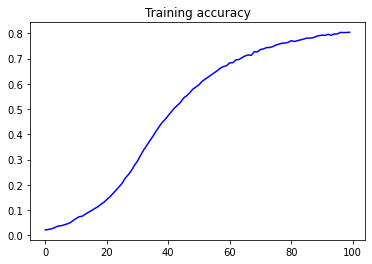

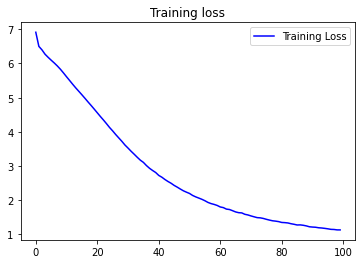

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()


plt.show()

### Predicting the next 100 words

In [26]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope be 'this it must die be bright twain love so glory do see true bright true 'will ' lies brought to make him seen cherish admire give hide ' doth grow rage of burn prove give change men quite fall by ill ' have do write not find true bright change loving friend true bright prove good friend forth true friend bright true bright 'no ' art not live she lies stol'n of him more doth tender'd change and friend much be ill eye ' spent hast not now so know true prove me prove thee achieve well remain ill


In [29]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
